Павлюк Екатерина, группа S4102

In [143]:
import os
import timeit
import numpy as np
import graphblas as gb
from graphblas import Matrix, dtypes, unary, binary, monoid, semiring, Recorder
from graphblas.io import mmread
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# Задание 1. Наивный алгоритм
- Используя `python-graphblas` реализовать наивный алгоритм, для матрицы смежности $A$ вычисляющий $A^3$ и возвращающий количество треугольников неориентированного графа.
  - Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
  - Функция возвращает число --- количество треугольников в графе.

In [26]:
def naive_alg(A) -> int:
    """Наивный алгоритм, возвращающий количество треугольников неориентированного графа.
    
    Алгоритм:
    - Вычисляем A^3 
    - Берем диагональ матрицы (все пути длины 3)
    - Находим след (сумму диагональных элементов)
    - Находим кол-во треугольников деля на 6
    """
    A_p3 = A.mxm(A).mxm(A)
    diagonal = A_p3.diag()
    n_triangles = diagonal.reduce(gb.agg.sum).value or 0
    return int(n_triangles / 6)

# Задание 2. Наивный алгоритм с маской
- Используя `python-graphblas` реализовать наивный алгоритм с маской, для матрицы смежности $A$ вычисляющий $A^2$ и возвращающий количество треугольников неориентированного графа.
  - Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
  - Функция возвращает число --- количество треугольников в графе.

In [42]:
def naive_alg_with_mask(A) -> int:
    """Наивный алгоритм  с маской, возвращающий количество треугольников неориентированного графа.
    
    Алгоритм:
    - Вычисляем A^2 
    - Вычисляем маску A и применяем к A^2
    - Суммируем элементы матрицы, делим на 6
    """
    A_p2 = A.mxm(A)
    mask = A.dup(dtype=dtypes.BOOL)
    A_p2_w_mask = A_p2.dup(mask=mask)
    n_triangles = A_p2_w_mask.reduce_scalar(gb.monoid.plus).value or 0
    return int(n_triangles / 6)

# Задание 3. Сohen's algorithm
- Используя `python-graphblas` реализовать Сohen's algorithm, вычисляющий количество треугольников неориентированного графа.
  - Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
  - Функция возвращает число --- количество треугольников в графе.

In [48]:
def сohens_alg(A) -> int:
    """Сohen's algorithm, вычисляющий количество треугольников неориентированного графа.
    
    Алгоритм:
    - Вычисляем нижнюю треугольную матрицу L
    - Вычисляем верхнюю треугольную матрицу U
    - Умножаем L на U и применяем маску A
    - Суммируем элементы матрицы, делим на 2
    """
    L = gb.select.tril(A)
    U = gb.select.triu(A)
    mask = A.dup(dtype=dtypes.BOOL)
    LU_w_mask = L.mxm(U).dup(mask=mask)
    n_triangles = LU_w_mask.reduce_scalar(gb.monoid.plus).value or 0
    return int(n_triangles / 2)

# Задание 4. Sandia algorithm
- Используя `python-graphblas` реализовать Sandia algorithm, вычисляющий количество треугольников неориентированного графа.
  - Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
  - Функция возвращает число --- количество треугольников в графе.

In [30]:
def sandia_alg(A) -> int:
    """Sandia algorithm, вычисляющий количество треугольников неориентированного графа.
    
    Алгоритм:
    - Вычисляем нижнюю треугольную матрицу L
    - Вычисляем L^2
    - Вычисляем маску L и применяем к L^2
    - Суммируем элементы матрицы
    """
    L = gb.select.tril(A)
    L_p2 = L.mxm(L)
    mask = L.dup(dtype=dtypes.BOOL)
    L_p2_w_mask = L_p2.dup(mask=mask)
    n_triangles = L_p2_w_mask.reduce_scalar(gb.monoid.plus).value or 0
    return int(n_triangles)

# Задание 5.  Функция, вычисляющая для каждой вершины неориентированного графа количество треугольников, в которых она участвует.
- (+2 балла) Используя `python-graphblas` реализовать функцию, вычисляющую для каждой вершины неориентированного графа количество треугольников, в которых она участвует.
  - Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
  - Функция возвращает массив, где для каждой вершины указано, в скольки треугольниках она участвует.

In [79]:
def n_triangles_for_vertex(A):
    A_p3 = A.mxm(A).mxm(A)
    diagonal = A_p3.diag()
    n_triangles = diagonal.apply(lambda x: x//2)
    return n_triangles.to_dense(fill_value=0)

# Задание 6. Тестирование
- Добавить тесты для проверки корректности полученных реализаций

## n_triangles_for_vertex

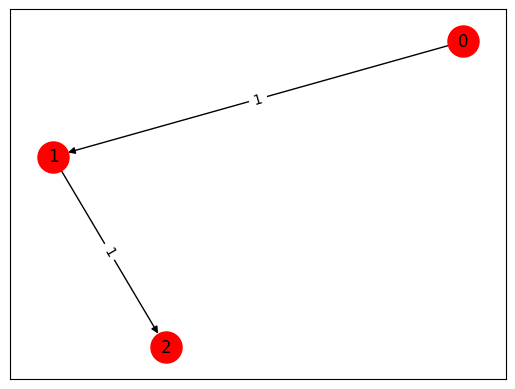

In [17]:
graph_wo_triangles = gb.Matrix.from_coo(
    [0, 1],
    [1, 2],
    [1, 1],
    nrows=3,
    ncols=3
)
gb.viz.draw(graph_wo_triangles)

In [80]:
res = n_triangles_for_vertex(graph_wo_triangles)
res

array([0, 0, 0], dtype=int64)

In [82]:
assert (res == np.array([0, 0, 0])).all()

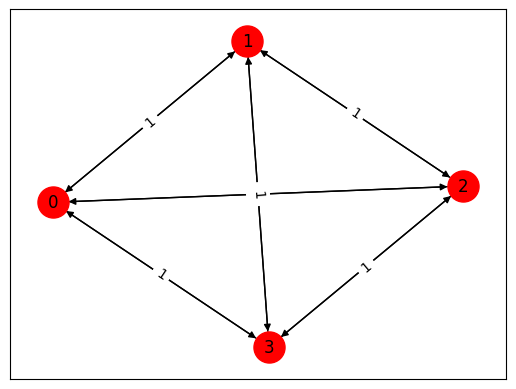

In [21]:
graph_w_triangles = gb.Matrix.from_coo(
    [0, 2, 0, 1, 2, 2, 3, 3, 1, 0, 3, 1],
    [2, 0, 3, 2, 1, 3, 0, 2, 0, 1, 1, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    nrows=4,
    ncols=4
)
gb.viz.draw(graph_w_triangles)

In [83]:
res = n_triangles_for_vertex(graph_w_triangles)
res

array([3, 3, 3, 3], dtype=int64)

In [84]:
assert (res == np.array([3, 3, 3, 3])).all()

## algs

In [53]:
algs = {
    'Naive': naive_alg,
    'Naive with mask': naive_alg_with_mask,
    'Сohens algorithm': сohens_alg,
    'Sandia algorithm': sandia_alg,
}
graphs = {
    'Graph without triangles': graph_wo_triangles,
    'Graph with triangles': graph_w_triangles,
}

In [55]:
for graph_name, graph in graphs.items():
    display(Markdown(f'# {graph_name}'))
    for alg_name, alg_func in algs.items():
        display(Markdown(f'### {alg_name}'))
        print(f'Result: {alg_func(graph)}')
        print(f'Time: ')
        %timeit alg_func(graph)
        print()

# Graph without triangles

### Naive

Result: 0
Time: 
69.4 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



### Naive with mask

Result: 0
Time: 
56.4 µs ± 6.69 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



### Сohens algorithm

Result: 0
Time: 
106 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



### Sandia algorithm

Result: 0
Time: 
111 µs ± 390 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



# Graph with triangles

### Naive

Result: 4
Time: 
72.1 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



### Naive with mask

Result: 4
Time: 
51.7 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



### Сohens algorithm

Result: 4
Time: 
97.9 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



### Sandia algorithm

Result: 4
Time: 
68.8 µs ± 977 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)



# Задание 7. Настоящие графы
- (+1 балл) Скачать 10 графов в формате Matrix Market с сайта SuiteSparse Matrix Collection и оценить время работы всех полученных реализаций. Сделать выводы.
  - В качестве фильтров для поиска графов на сайте использовать следующие значения: Rutherford-Boeing Type = Binary, Special Structure = Symmetric, Nonzeros.Min = 10000.

In [114]:
files = [elem for elem in os.listdir('C:/Users/Екатерина/jupyter/graph_lab/lab01/') if '.mtx' in elem]
files

['delaunay_n11.mtx',
 'delaunay_n12.mtx',
 'delaunay_n14.mtx',
 'delaunay_n15.mtx',
 'Erdos972.mtx',
 'EX4.mtx',
 'G43.mtx',
 'pds10.mtx',
 'usroads.mtx',
 'wing_nodal.mtx']

In [115]:
len(files)

10

In [116]:
real_graphs = dict()
for file_name in files:
    real_graphs[file_name.replace('.mtx', '')] = mmread(file_name)

In [117]:
for i, (graph_name, graph) in enumerate(real_graphs.items()):
    display(Markdown(f'# Graph name: {graph_name} ({i+1}/{len(real_graphs)})'))
    print(f'Количество вершин = {graph.shape[0]}, количество ребер = {len(graph.to_coo()[0])}')
    for alg_name, alg_func in algs.items():
        display(Markdown(f'### {alg_name}'))
        print(f'Result: {alg_func(graph)}')
        print(f'Time: ')
        %timeit alg_func(graph)

# Graph name: delaunay_n11 (1/10)

Количество вершин = 2048, количество ребер = 12254


### Naive

Result: 4104
Time: 
4.32 ms ± 65.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 4104
Time: 
748 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Сohens algorithm

Result: 4104
Time: 
707 µs ± 40.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Sandia algorithm

Result: 4104
Time: 
492 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Graph name: delaunay_n12 (2/10)

Количество вершин = 4096, количество ребер = 24528


### Naive

Result: 8215
Time: 
5.93 ms ± 75.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 8215
Time: 
1.26 ms ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Сohens algorithm

Result: 8215
Time: 
1.29 ms ± 64.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Sandia algorithm

Result: 8215
Time: 
904 µs ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Graph name: delaunay_n14 (3/10)

Количество вершин = 16384, количество ребер = 98244


### Naive

Result: 32921
Time: 
9.62 ms ± 53.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 32921
Time: 
2.4 ms ± 91.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Сohens algorithm

Result: 32921
Time: 
2.36 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Sandia algorithm

Result: 32921
Time: 
2.38 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Graph name: delaunay_n15 (4/10)

Количество вершин = 32768, количество ребер = 196548


### Naive

Result: 65872
Time: 
18.2 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Naive with mask

Result: 65872
Time: 
4.11 ms ± 47.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Сohens algorithm

Result: 65872
Time: 
3.62 ms ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Sandia algorithm

Result: 65872
Time: 
3.07 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Graph name: Erdos972 (5/10)

Количество вершин = 5488, количество ребер = 14170


### Naive

Result: 1500
Time: 
7.79 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 1500
Time: 
566 µs ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Сohens algorithm

Result: 1500
Time: 
568 µs ± 33.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Sandia algorithm

Result: 1500
Time: 
522 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Graph name: EX4 (6/10)

Количество вершин = 2600, количество ребер = 71760


### Naive

Result: 35880
Time: 
43.7 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Naive with mask

Result: 35880
Time: 
1.91 ms ± 64.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Сohens algorithm

Result: 35880
Time: 
1.51 ms ± 91.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Sandia algorithm

Result: 35880
Time: 
1.05 ms ± 49.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Graph name: G43 (7/10)

Количество вершин = 1000, количество ребер = 19980


### Naive

Result: 1392
Time: 
13.4 ms ± 85.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 1392
Time: 
579 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Сohens algorithm

Result: 1392
Time: 
580 µs ± 74.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Sandia algorithm

Result: 1392
Time: 
472 µs ± 6.39 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Graph name: pds10 (8/10)

Количество вершин = 16558, количество ребер = 149658


### Naive

Result: 79682
Time: 
The slowest run took 8.70 times longer than the fastest. This could mean that an intermediate result is being cached.
90.7 ms ± 96.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Naive with mask

Result: 79682
Time: 
3.99 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Сohens algorithm

Result: 118477
Time: 
3.6 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Sandia algorithm

Result: 160031
Time: 
2.37 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Graph name: usroads (9/10)

Количество вершин = 129164, количество ребер = 330870


### Naive

Result: 4237
Time: 
13.6 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 4237
Time: 
3.57 ms ± 55.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Сohens algorithm

Result: 4237
Time: 
5.86 ms ± 85.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Sandia algorithm

Result: 4237
Time: 
4.28 ms ± 66.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Graph name: wing_nodal (10/10)

Количество вершин = 10937, количество ребер = 150976


### Naive

Result: 133847
Time: 
24.1 ms ± 595 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Naive with mask

Result: 133847
Time: 
5.1 ms ± 85.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Сohens algorithm

Result: 133847
Time: 
4.07 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Sandia algorithm

Result: 133847
Time: 
2.95 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Выводы
1. Наивные алгоримы проигрывают остальным. При этом наивный алгоритм с маской работает быстрее.
2. Сohens algorithm и Sandia algorithm являются более эффективными. При этом Sandia algorithm зачастую работает быстрее Сohens algorithm.

# Задание 8. Генератор случайных неориентированных графов
- (+2 балла) Реализовать генератор случайных неориентированных графов, в котором можно задавать количество вершин и степень разреженности графа. Путём генерации случайных графов различного размера и с разной степенью разреженности, оценить время работы всех полученных реализаций и исследовать границы их применимости. Сделать выводы.

In [119]:
def generate_graph(n_vertices, density):
    matrix = np.zeros((n_vertices, n_vertices))
    for i in range(n_vertices):
        for j in range(i, n_vertices):
            if np.random.rand() < density:
                matrix[i-1, j-1] = 1
    np.fill_diagonal(matrix, 0)
    matrix += matrix.T
    matrix = Matrix.from_dense(matrix, missing_value=0.0)
    return matrix

In [127]:
test_graph = generate_random_graph(7, 0.3)
test_graph

"M_7481146"  nvals  nrows  ncols  dtype   format
gb.Matrix       14      7      7   FP64  bitmapr
------------------------------------------------
     0    1    2    3    4    5    6
0                 1.0  1.0          
1                                1.0
2                           1.0     
3  1.0                      1.0     
4  1.0                           1.0
5            1.0  1.0            1.0
6       1.0            1.0  1.0

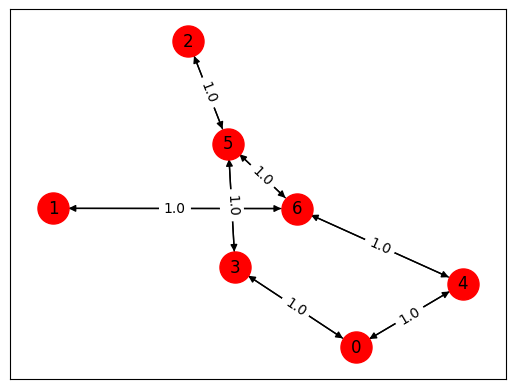

In [128]:
gb.viz.draw(test_graph)

In [139]:
from tqdm import tqdm
import pandas as pd

In [138]:
for density in [0.1, 0.5, 0.8]:
    display(Markdown(f'# Плотность: {density}'))
    for n_vertices in (100, 500, 1_000):
        display(Markdown(f'## Кол-во вершин: {n_vertices}'))
        graph = generate_random_graph(n_vertices, density)
        print(f'Количество вершин = {n_vertices}, количество ребер = {len(graph.to_coo()[0])}, плотность: {density}')
        for alg_name, alg_func in algs.items():
            display(Markdown(f'### {alg_name}'))
            print(f'Result: {alg_func(graph)}')
            print(f'Time: ')
            %timeit alg_func(graph)

# Плотность: 0.1

## Кол-во вершин: 100

Количество вершин = 100, количество ребер = 1024, плотность: 0.1


### Naive

Result: 187
Time: 
457 µs ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Naive with mask

Result: 187
Time: 
107 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Сohens algorithm

Result: 187
Time: 
139 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Sandia algorithm

Result: 187
Time: 
102 µs ± 2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Кол-во вершин: 500

Количество вершин = 500, количество ребер = 24884, плотность: 0.1


### Naive

Result: 20375
Time: 
4.78 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 20375
Time: 
1.2 ms ± 64.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Сohens algorithm

Result: 20375
Time: 
916 µs ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Sandia algorithm

Result: 20375
Time: 
701 µs ± 43 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Кол-во вершин: 1000

Количество вершин = 1000, количество ребер = 100102, плотность: 0.1


### Naive

Result: 167209
Time: 
19 ms ± 863 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 167209
Time: 
4.87 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Сohens algorithm

Result: 167209
Time: 
2.8 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Sandia algorithm

Result: 167209
Time: 
2.53 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Плотность: 0.5

## Кол-во вершин: 100

Количество вершин = 100, количество ребер = 4972, плотность: 0.5


### Naive

Result: 20461
Time: 
2.45 ms ± 71 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Naive with mask

Result: 20461
Time: 
1.55 ms ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Сohens algorithm

Result: 20461
Time: 
760 µs ± 9.15 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Sandia algorithm

Result: 20461
Time: 
730 µs ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Кол-во вершин: 500

Количество вершин = 500, количество ребер = 124702, плотность: 0.5


### Naive

Result: 2586591
Time: 
75.9 ms ± 426 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Naive with mask

Result: 2586591
Time: 
42.4 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Сohens algorithm

Result: 2586591
Time: 
19.9 ms ± 96.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Sandia algorithm

Result: 2586591
Time: 
11.3 ms ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Кол-во вершин: 1000

Количество вершин = 1000, количество ребер = 499314, плотность: 0.5


### Naive

Result: 20749071
Time: 
608 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Naive with mask

Result: 20749071
Time: 
334 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Сohens algorithm

Result: 20749071
Time: 
125 ms ± 979 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Sandia algorithm

Result: 20749071
Time: 
68.7 ms ± 2.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Плотность: 0.8

## Кол-во вершин: 100

Количество вершин = 100, количество ребер = 8050, плотность: 0.8


### Naive

Result: 86853
Time: 
1.78 ms ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Naive with mask

Result: 86853
Time: 
1.38 ms ± 5.33 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Сohens algorithm

Result: 86853
Time: 
718 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Sandia algorithm

Result: 86853
Time: 
648 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Кол-во вершин: 500

Количество вершин = 500, количество ребер = 199590, плотность: 0.8


### Naive

Result: 10600993
Time: 
58.3 ms ± 249 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Naive with mask

Result: 10600993
Time: 
41.8 ms ± 241 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Сohens algorithm

Result: 10600993
Time: 
19.6 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Sandia algorithm

Result: 10600993
Time: 
11.1 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Кол-во вершин: 1000

Количество вершин = 1000, количество ребер = 798922, плотность: 0.8


### Naive

Result: 84986769
Time: 
451 ms ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Naive with mask

Result: 84986769
Time: 
343 ms ± 5.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Сohens algorithm

Result: 84986769
Time: 
125 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Sandia algorithm

Result: 84986769
Time: 
69.3 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [140]:
df_density = []
df_n_vertices = []
df_alg_name = []
df_time = []

for density in tqdm([0.1, 0.5, 0.8]):
    for n_vertices in (10, 100, 500, 1_000):
        graph = generate_random_graph(n_vertices, density)
        for alg_name, alg_func in algs.items():
            time_expr = timeit.timeit(lambda: alg_func(graph), number=10)
            
            df_density.append(density)
            df_n_vertices.append(n_vertices)
            df_alg_name.append(alg_name)
            df_time.append(time_expr)
            
expr_res = pd.DataFrame(
    {
        'density': df_density,
        'n_vertices': df_n_vertices,
        'alg_name': df_alg_name,
        'time': df_time,
    }
)        


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:26<00:00,  8.86s/it]


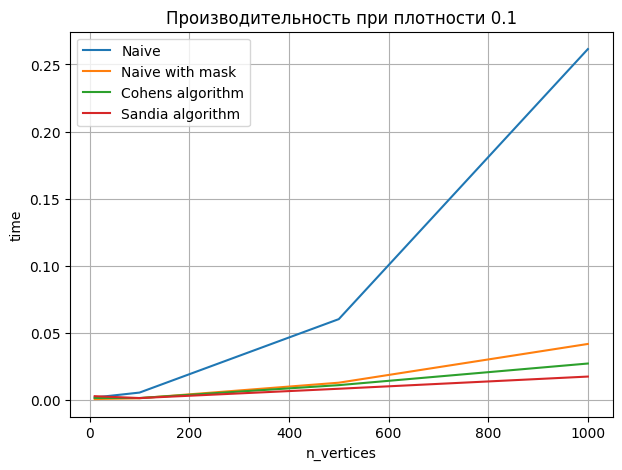

In [145]:
plt.figure(figsize=(7, 5))

for alg_name in algs.keys():
    tmp = expr_res[
        expr_res['density'].eq(0.1)
        & expr_res['alg_name'].eq(alg_name)
    ].sort_values('n_vertices')
    plt.plot(
        tmp['n_vertices'].values,
        tmp['time'].values,
        label=alg_name,
    )

plt.xlabel('n_vertices')
plt.ylabel('time')
plt.title('Производительность при плотности 0.1')
plt.legend()
plt.grid(True)
plt.show()

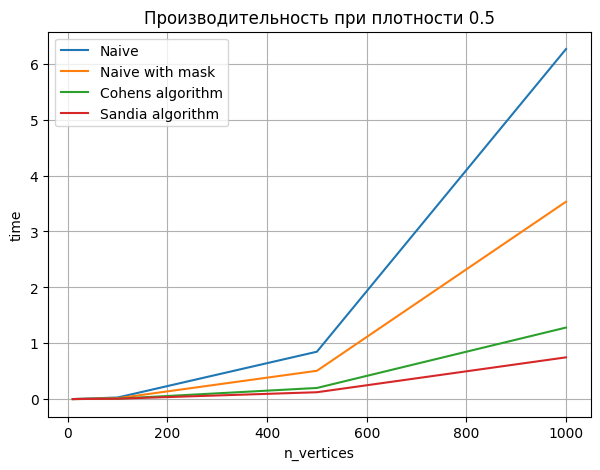

In [146]:
plt.figure(figsize=(7, 5))

for alg_name in algs.keys():
    tmp = expr_res[
        expr_res['density'].eq(0.5)
        & expr_res['alg_name'].eq(alg_name)
    ].sort_values('n_vertices')
    plt.plot(
        tmp['n_vertices'].values,
        tmp['time'].values,
        label=alg_name,
    )

plt.xlabel('n_vertices')
plt.ylabel('time')
plt.title('Производительность при плотности 0.5')
plt.legend()
plt.grid(True)
plt.show()

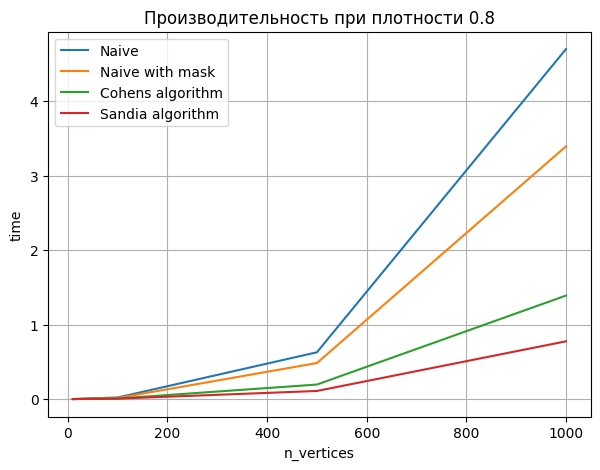

In [147]:
plt.figure(figsize=(7, 5))

for alg_name in algs.keys():
    tmp = expr_res[
        expr_res['density'].eq(0.8)
        & expr_res['alg_name'].eq(alg_name)
    ].sort_values('n_vertices')
    plt.plot(
        tmp['n_vertices'].values,
        tmp['time'].values,
        label=alg_name,
    )

plt.xlabel('n_vertices')
plt.ylabel('time')
plt.title('Производительность при плотности 0.8')
plt.legend()
plt.grid(True)
plt.show()

## Выводы
- Выводы из предыдущего задания сохраняются
    - При увеличении плотности графа наивный алгоритм проигрывает.
    - Наиболее производительным является Sandia algorithm
